In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("BIKE DETAILS.csv")
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


In [ ]:
#1. what is the range of selling price in the data set.

df_min = df['selling_price'].min()
df_max = df['selling_price'].max()

print(f"The range of selling price in the data set is from {df_min} to {df_max} ")

The range of selling price in the data set is from 5000 to 760000 


In [ ]:
#2. What is the median selling price for bikes in the dataset?

medaian_selling_price = df['selling_price'].median()
print(f"The median selling price for bikes in the data set is {medaian_selling_price}")

The median selling price for bikes in the data set is 45000.0


In [ ]:
#3. What is the most common seller type?

common = df['seller_type'].mode()
print(f"The most common seller type is {common[0]}.")

The most common seller type is Individual.


In [ ]:
#4. How many bikes have driven more than 50,000 kilometers?

driven = df['km_driven'] > 50000
count = driven.value_counts()[True]
print(f"{count} bikes has driven more than 50,000 kilometers.")

170 bikes has driven more than 50,000 kilometers.


In [ ]:
#5. What is the average km_driven value for each ownership type
avg_driven_by_owner = df.groupby('owner')['km_driven'].mean()
print(f"average kilommeter driven for each owner as like this: \n{avg_driven_by_owner}")

average kilommeter driven for each owner as like this: 
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
#6. What proportion of bikes are from the year 2015 or older?

bikes_older_2015 = df['year'] <= 2015
proportion = bikes_older_2015.value_counts(normalize=True)
print(f"The proportion of bikes are from the year 2015 or older is {proportion[True]}.")

The proportion of bikes are from the year 2015 or older is 0.5664467483506126.


In [ ]:
#7. What is the trend of missing values across the dataset?

missing_values = df.isnull().sum()
print(f"The trend of missing values across the dataset is as like this: \n{missing_values}")

The trend of missing values across the dataset is as like this: 
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [ ]:
#8. What is the highest ex_showroom_price recorded, and for which bike?

highest_price = df['ex_showroom_price'].max()
highest_price_row = df[df['ex_showroom_price'] == highest_price]
bike_name = highest_price_row['name'].values[0]

print(f"The highest price of ex showroom is {highest_price} and the bike is {bike_name}.")

The highest price of ex showroom is 1278000.0 and the bike is Harley-Davidson Street Bob.


In [ ]:
#9. What is the total number of bikes listed by each seller type?

total_bikes_by_seller = df.groupby('seller_type')['name'].count()
print(f"The total number of bikes listed by each seller type is as like this: \n{total_bikes_by_seller}")

The total number of bikes listed by each seller type is as like this: 
seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64


In [ ]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?

first_owner_bikes = df[df['owner'] == '1st owner']
selling_price_km_driven = first_owner_bikes.groupby('owner')[['selling_price', 'km_driven']].mean()
print(f"The relationship between selling_price and km_driven for first-owner bikes is as like this: \n{selling_price_km_driven}")

The relationship between selling_price and km_driven for first-owner bikes is as like this: 
           selling_price     km_driven
owner                                 
1st owner   60022.813853  32816.583333


In [ ]:
#11. Identify and remove outliers in the km_driven column using the IQR method?

IQR = df['km_driven'].quantile(0.75) - df['km_driven'].quantile(0.25)
lower_bound = df['km_driven'].quantile(0.25) - 1.5 * IQR
upper_bound = df['km_driven'].quantile(0.75) + 1.5 * IQR
df = df[(df['km_driven'] >= lower_bound) | (df['km_driven'] <= upper_bound)]

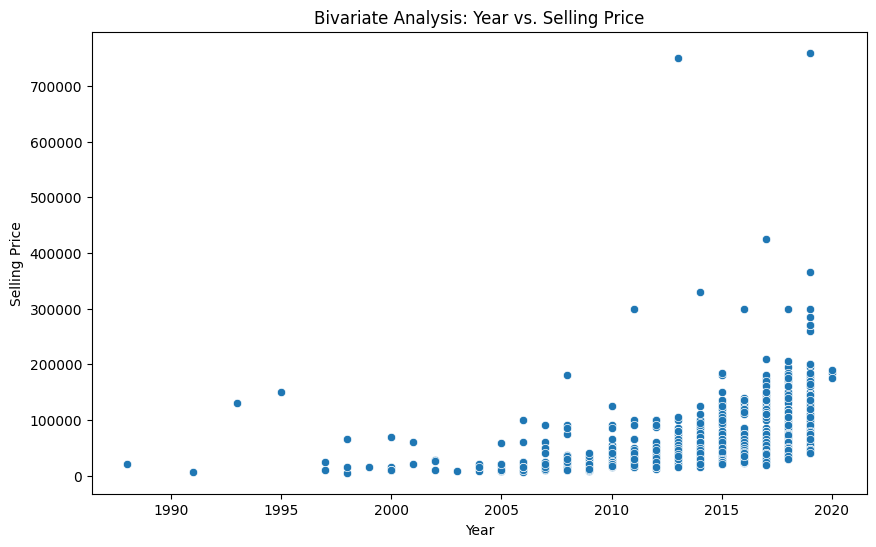

In [ ]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Bivariate Analysis: Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
#13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

current_year = 2025
age = current_year - df['year']
depreciation = df['selling_price'] / age
average_depreciation = depreciation.mean()
print(f"The average depreciation in selling price based on the bike's age is {average_depreciation}.")

The average depreciation in selling price based on the bike's age is 7001.296158257802.


In [ ]:
#14. Which bike names are priced significantly above the average price for their manufacturing year?

df['average_price_by_year'] = df.groupby('year')['selling_price'].transform('mean')
significantly_above_average = df[df['selling_price'] > df['average_price_by_year']]['name']

print(f"Bike names priced significantly above average for their year: \n{significantly_above_average}")

Bike names priced significantly above average for their year: 
0                  Royal Enfield Classic 350
2        Royal Enfield Classic Gunmetal Grey
3          Yamaha Fazer FI V 2.0 [2016-2018]
7       Royal Enfield Bullet 350 [2007-2011]
13                             Yamaha YZF R3
                        ...                 
1004                    Bajaj Pulsar  NS 200
1005                      TVS Apache RTR 160
1008                      Bajaj Pulsar 220 F
1012                     Bajaj Pulsar NS 200
1023                  Bajaj Avenger 220 dtsi
Name: name, Length: 334, dtype: object


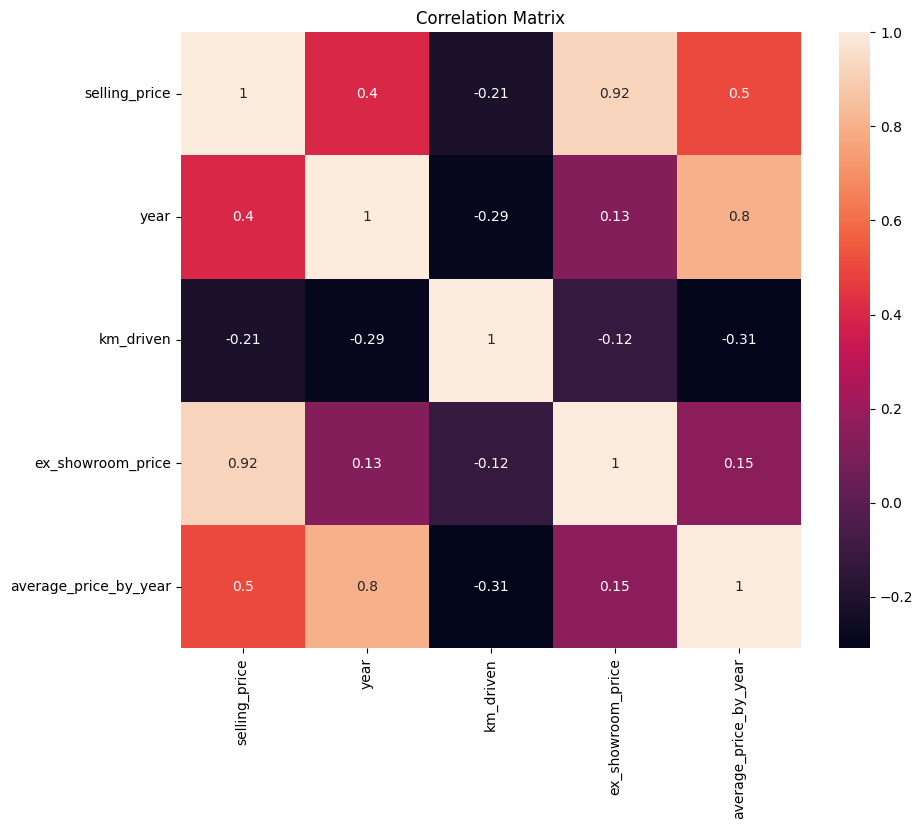

In [ ]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df = pd.read_csv('Car Sale.csv')
df.dtypes

,0
Car_id,object
Date,object
Customer Name,object
Gender,object
Annual Income,int64
Dealer_Name,object
Company,object
Model,object
Engine,object
Transmission,object


In [ ]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

avg_selling_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()
print(f"The average selling price of cars for each dealer is as like this: \n{avg_selling_price_by_dealer}")

The average selling price of cars for each dealer is as like this: 
Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet          

In [ ]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

car_brand_variation = df.groupby('Company')['Price ($)'].std()
highest_variation_brand = car_brand_variation.idxmax()
print(f"The car brand with the highest variation in prices is {highest_variation_brand}.")

The car brand with the highest variation in prices is Lincoln.


<Axes: xlabel='Transmission', ylabel='Price ($)'>

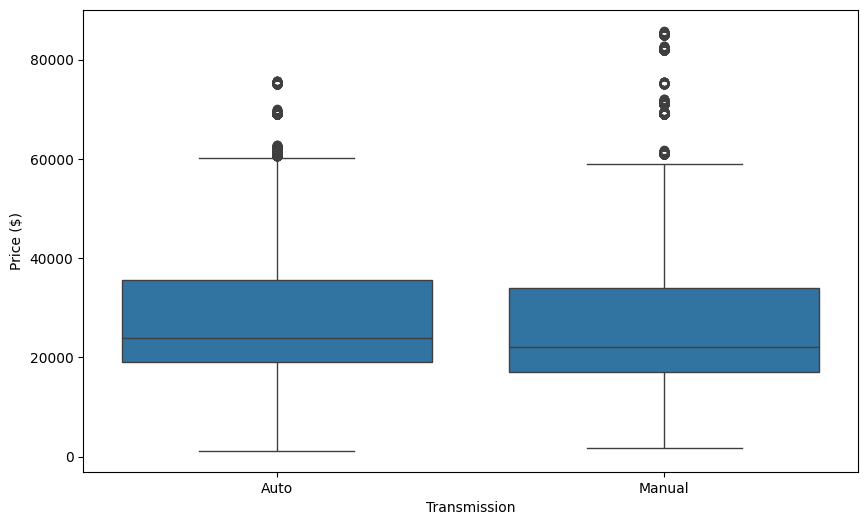

In [ ]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Transmission', y='Price ($)')

<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

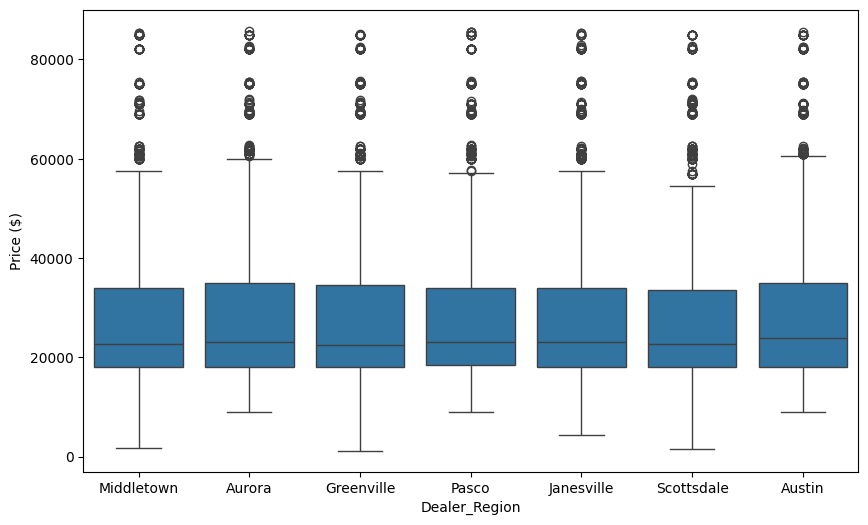

In [ ]:
#4.  What is the distribution of car prices across different regions?

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')

<Axes: xlabel='Body Style', ylabel='count'>

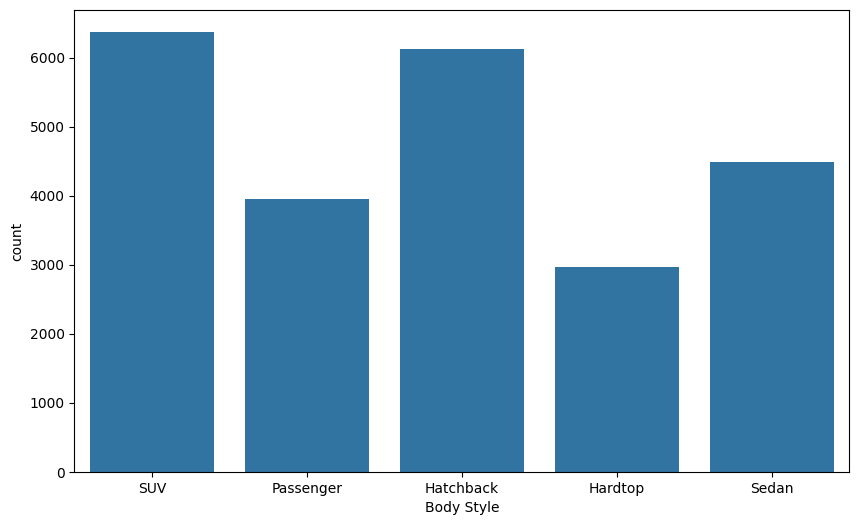

In [ ]:
#5. What is the distribution of cars based on body styles?

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Body Style')

<Axes: xlabel='Annual Income', ylabel='Price ($)'>

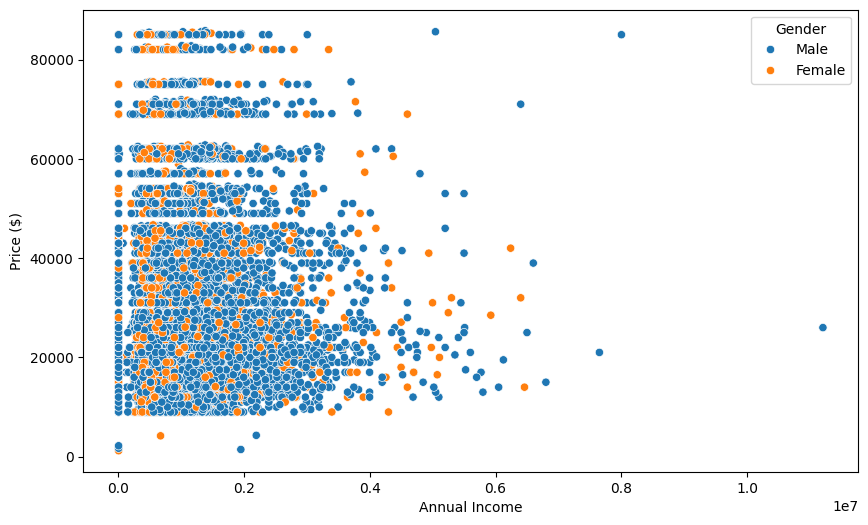

In [ ]:
#6. How does the average selling price of cars vary by customer gender and annual income?

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income', y='Price ($)', hue='Gender')

<Axes: xlabel='Dealer_Region', ylabel='count'>

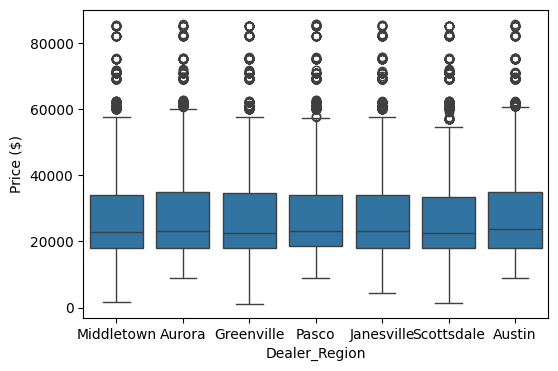

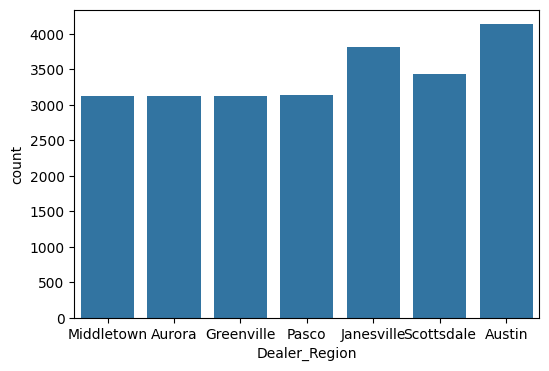

In [ ]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Dealer_Region')

<Axes: xlabel='Engine', ylabel='Price ($)'>

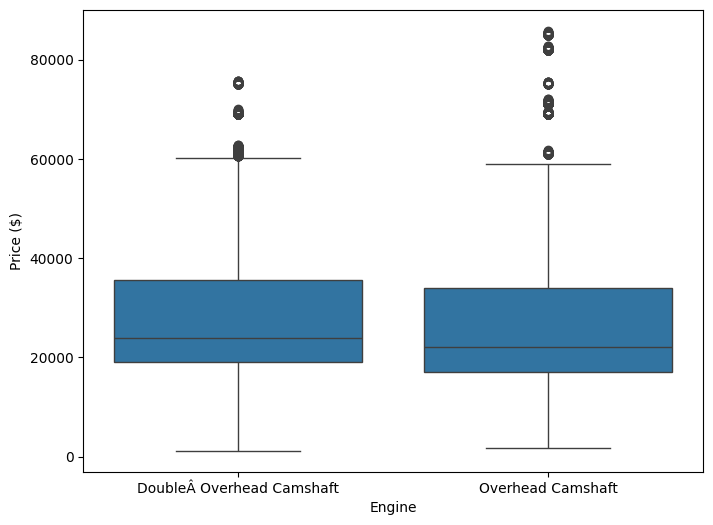

In [ ]:
#8. How does the average car price differ between cars with different engine sizes?

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Engine', y='Price ($)')

<Axes: xlabel='Annual Income', ylabel='Price ($)'>

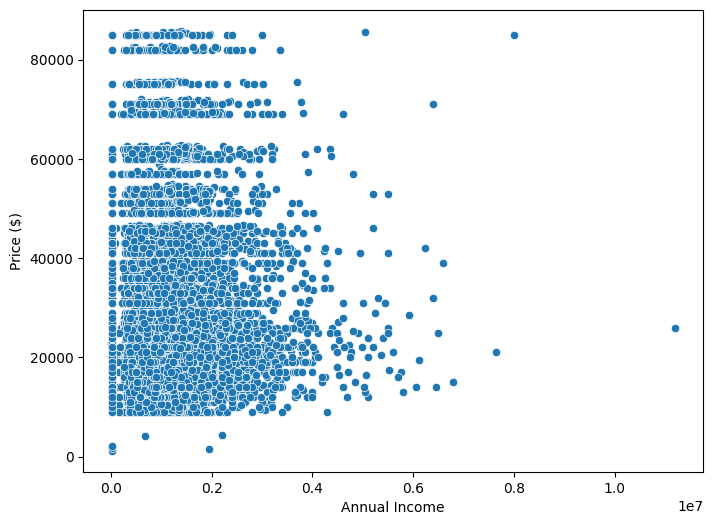

In [ ]:
#9. How do car prices vary based on the customer’s annual income bracket?

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income', y='Price ($)')

<Axes: xlabel='Model', ylabel='Price ($)'>

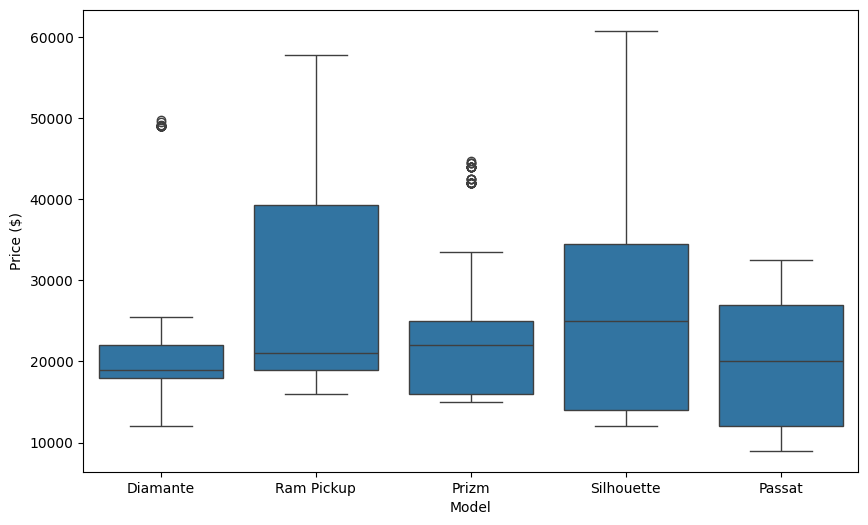

In [ ]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

top_5_models = df.groupby('Model')['Price ($)'].count().nlargest(5)
top_5_models_data = df[df['Model'].isin(top_5_models.index)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=top_5_models_data, x='Model', y='Price ($)')


The color with the highest variation in prices is Red.


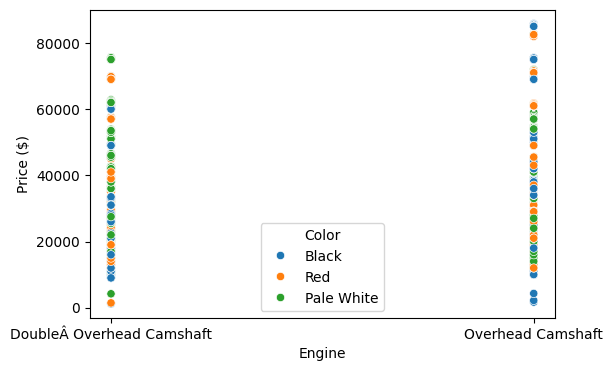

In [ ]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Engine', y='Price ($)', hue='Color')

color_price_variation = df.groupby('Color')['Price ($)'].std()
highest_variation_color = color_price_variation.idxmax()
print(f"The color with the highest variation in prices is {highest_variation_color}.")

<Axes: xlabel='Month', ylabel='count'>

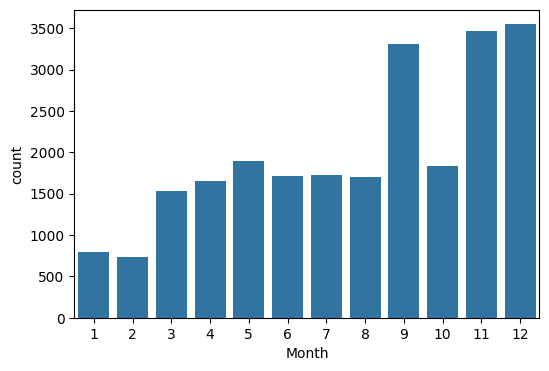

In [ ]:
#12. Is there any seasonal trend in car sales based on the date of sale?

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Month')

In the month of September, November and December sales of cars are on their peak.

<Axes: xlabel='Body Style', ylabel='Price ($)'>

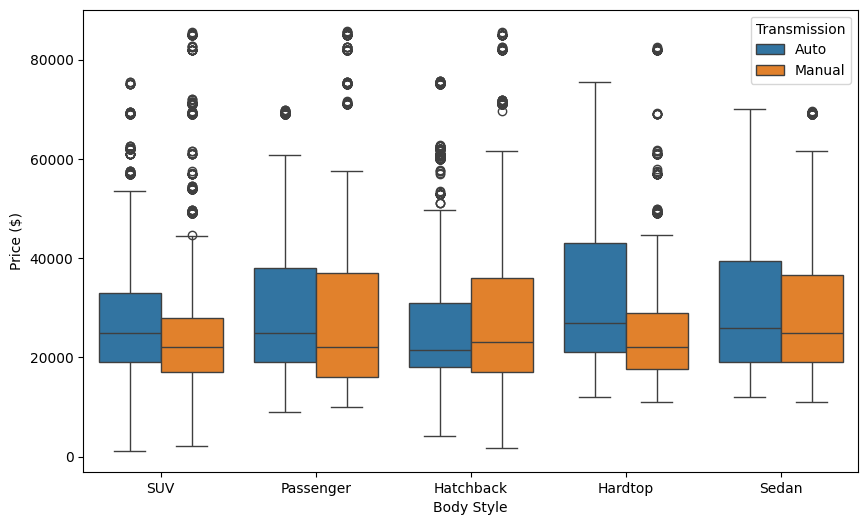

In [ ]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type?

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')

In [ ]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

correlation_matrix = df[['Price ($)', 'Engine', 'Annual Income']].corr()
print(f"The correlation between car price, engine size, and annual income of customers is as like this: \n{correlation_matrix}")

The correlation between car price, engine size, and annual income of customers is as like this: 
               Price ($)  Engine  Annual Income
Price ($)       1.000000     NaN       0.012065
Engine               NaN     NaN            NaN
Annual Income   0.012065     NaN       1.000000


<Axes: xlabel='Price ($)', ylabel='Model'>

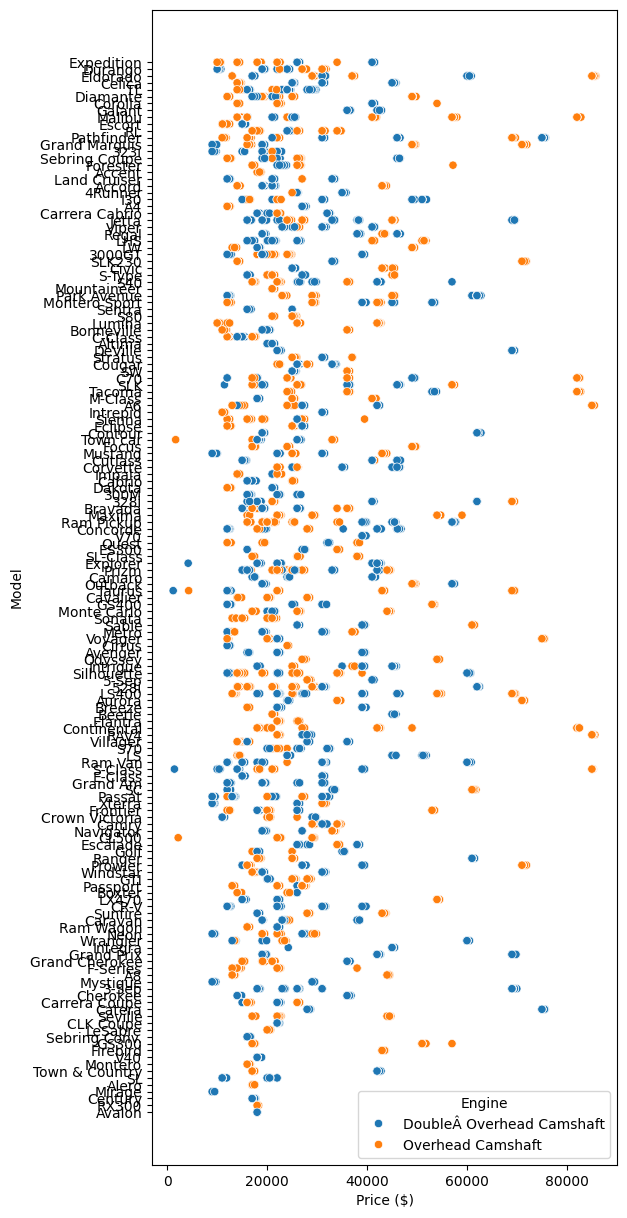

In [ ]:
#15. How does the average car price vary across different car models and engine types?

df['Engine'] = pd.read_csv("Car Sale.csv")['Engine']
plt.figure(figsize=(6, 15))
sns.scatterplot(data=df, x='Price ($)', y='Model', hue = 'Engine')

In [4]:
df = pd.read_csv('amazon.csv')
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [5]:
df.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


In [13]:
df['rating'] = pd.to_numeric(df['rating'], errors = 'coerce').astype(float)
df['rating']

,rating
0,4.2
1,4.0
2,3.9
3,4.2
4,4.2
...,...
1460,4.0
1461,4.1
1462,3.6
1463,4.0


In [14]:
#1. What is the average rating for each product category

avg_rating = df.groupby('category')['rating'].mean()
print(f"The average rating for each product category is as like this: \n{avg_rating}")

The average rating for each product category is as like this: 
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProdu

In [27]:
df['rating_count'] = df['rating_count'].str.replace(",", " ").astype(float)
df['rating_count']

,rating_count
0,24269.0
1,43994.0
2,7928.0
3,94363.0
4,16905.0
...,...
1460,1090.0
1461,4118.0
1462,468.0
1463,8031.0


In [28]:
#2. What are the top rating_count products by category?

top_rating_count = df.groupby('category')['rating_count'].max()
print(f"The top rating_count products by category is as like this: \n{top_rating_count}")

The top rating_count products by category is as like this: 
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                     1118.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                    4426.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                            7222.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        14969.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                            7352.0
                                                                                                                           ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         5792.0
OfficeProducts|Office

In [37]:
df['discounted_price'] = df['discounted_price'].str.replace("₹", "")
df['discounted_price'] = df['discounted_price'].str.replace(",", "").str.replace(" ", "").astype(float)
df['discounted_price']

,discounted_price
0,399.0
1,199.0
2,199.0
3,329.0
4,154.0
...,...
1460,379.0
1461,2280.0
1462,2219.0
1463,1399.0


In [38]:
df['actual_price'] = df['actual_price'].str.replace("₹", "")
df['actual_price'] = df['actual_price'].str.replace(",", "").str.replace(" ", "").astype(float)
df['actual_price']

,actual_price
0,1099.0
1,349.0
2,1899.0
3,699.0
4,399.0
...,...
1460,919.0
1461,3045.0
1462,3080.0
1463,1890.0


<Axes: xlabel='discounted_price', ylabel='actual_price'>

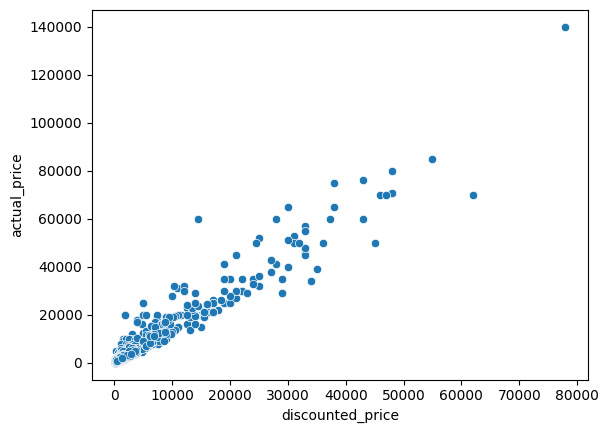

In [39]:
#3. What is the distribution of discounted prices vs. actual prices?

sns.scatterplot(data=df, x='discounted_price', y='actual_price')

In [41]:
df['discount_percentage'] = df['discount_percentage'].str.replace("%", "").astype(float)
df['discount_percentage']

,discount_percentage
0,64.0
1,43.0
2,90.0
3,53.0
4,61.0
...,...
1460,59.0
1461,25.0
1462,28.0
1463,26.0


In [42]:
#4. How does the average discount percentage vary across categories?

avg_discount_percentage = df.groupby('category')['discount_percentage'].mean()
print(f"The average discount percentage across categories is as like this: \n{avg_discount_percentage}")

The average discount percentage across categories is as like this: 
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts

In [43]:
#5. What are the most popular product names?

popular_products = df['product_name'].value_counts().head(10)
print(f"The most popular product names are as like this: \n{popular_products}")

The most popular product names are as like this: 
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM

In [47]:
#6. What are the most popular product keywords?

if 'product_keywords' in df.columns:
  popular_keywords = df['product_keywords'].value_counts().head(10)
  print(f"The most popular product keywords are as like this: \n{popular_keywords}")
else:
  print("The 'product_keywords' column is not present in the DataFrame.")

The 'product_keywords' column is not present in the DataFrame.


In [49]:
#7. What are the most popular product reviews?

popular_reviews = df['review_title'].value_counts().head(10)
print(f"The most popular product reviews are as like this: \n{popular_reviews}")

The most popular product reviews are as like this: 
review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
Good product,Good one,Nice,Really nice product,Very first time

In [50]:
#8. What is the correlation between discounted_price and rating?

correlation = df['discounted_price'].corr(df['rating'])
print(f"The correlation between discounted_price and rating is {correlation}.")

The correlation between discounted_price and rating is 0.12033741712288548.


In [51]:
#9. What are the Top 5 categories based on the highest ratings?

top_5_categories = df.groupby('category')['rating'].mean().nlargest(5)
print(f"The Top 5 categories based on the highest ratings are as like this: \n{top_5_categories}")

The Top 5 categories based on the highest ratings are as like this: 
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [57]:
#10. Identify any potential areas for improvement or optimization based on the data analysis.

products_catagories = df.loc[df['rating']<3.5, 'category'].unique()
print(f"The potential areas for improvement or optimization based on the data analysis are as like this: \n{products_catagories}")

The potential areas for improvement or optimization based on the data analysis are as like this: 
['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables'
 'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions'
 'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls'
 'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters'
 'Electronics|WearableTechnology|SmartWatches'
 'Computers&Accessories|Accessories&Peripherals|USBHubs'
 'Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear'
 'Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones'
 'Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers'
 'Computers&Accessories|Printers,Inks&Accessories|Printers|InkjetPrinters'
 'Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders'
 'Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters'
 'Home&Kitchen|Kitchen&Home

this products had less rating cpmapring to others they had below 3.5 rating, so this are the products where we need improvement.

In [59]:
df = pd.read_csv('spotify.csv')
df.dtypes

,0
Artist,object
Track Name,object
Popularity,int64
Duration (ms),int64
Track ID,object


In [60]:
#1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [68]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

<Axes: xlabel='Popularity', ylabel='Count'>

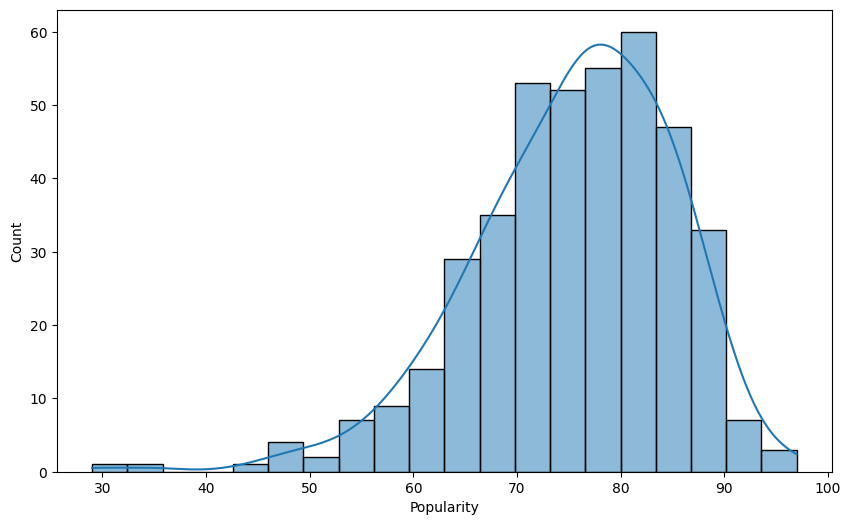

In [70]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Popularity', bins=20, kde=True)

<Axes: xlabel='Popularity', ylabel='Duration (ms)'>

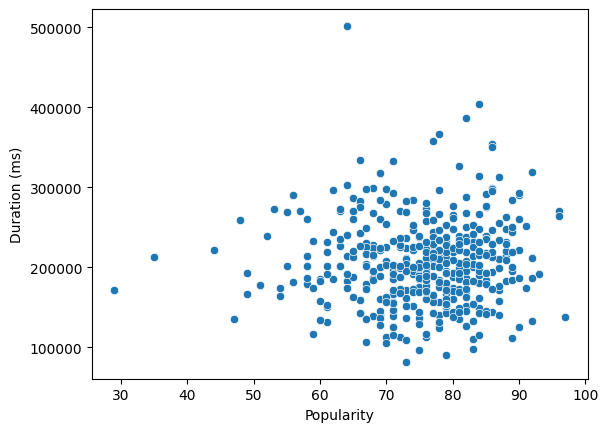

In [72]:
 #3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

sns.scatterplot(data=df, x='Popularity', y='Duration (ms)')

The artist with the highest number of tracks in the dataset is Drake.


<Axes: xlabel='Artist', ylabel='count'>

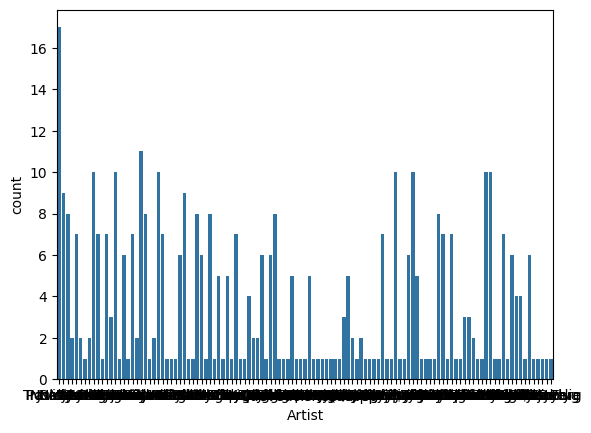

In [74]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

artist_track_count = df['Artist'].value_counts()
highest_artist = artist_track_count.idxmax()
print(f"The artist with the highest number of tracks in the dataset is {highest_artist}.")

sns.countplot(data=df, x='Artist')

In [76]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name']]
print(f"The top 5 least popular tracks in the dataset are as like this: \n{least_popular_tracks}")

The top 5 least popular tracks in the dataset are as like this: 
             Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)


In [78]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

top_5_most_popular_artists = df.nlargest(5, 'Popularity')['Artist'].unique()
avg_popularity_by_artist = df[df['Artist'].isin(top_5_most_popular_artists)].groupby('Artist')['Popularity'].mean()
highest_avg_popularity_artist = avg_popularity_by_artist.idxmax()
print(f"The artist with the highest average popularity among the top 5 most popular artists is {highest_avg_popularity_artist}.")
avg_popularity_by_artist

The artist with the highest average popularity among the top 5 most popular artists is Travis Scott.


,Popularity
Artist,
21 Savage,83.800000
Drake,82.882353
Jack Harlow,77.714286
Travis Scott,86.555556
¥$,85.100000


In [79]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

top_5_most_popular_artists = df.nlargest(5, 'Popularity')['Artist'].unique()
most_popular_tracks_by_artist = df[df['Artist'].isin(top_5_most_popular_artists)].groupby('Artist')['Track Name'].apply(list)
print(f"The most popular tracks for each of the top 5 most popular artists are as like this: \n{most_popular_tracks_by_artist}")

The most popular tracks for each of the top 5 most popular artists are as like this: 
Artist
21 Savage       [née-nah, redrum, n.h.i.e., Glock In My Lap, a...
Drake           [Rich Baby Daddy (feat. Sexyy Red & SZA), One ...
Jack Harlow     [Lovin On Me, First Class, Tyler Herro, WHATS ...
Travis Scott    [MELTDOWN (feat. Drake), FE!N (feat. Playboi C...
¥$              [CARNIVAL, BURN, FUK SUMN, BACK TO ME, STARS, ...
Name: Track Name, dtype: object


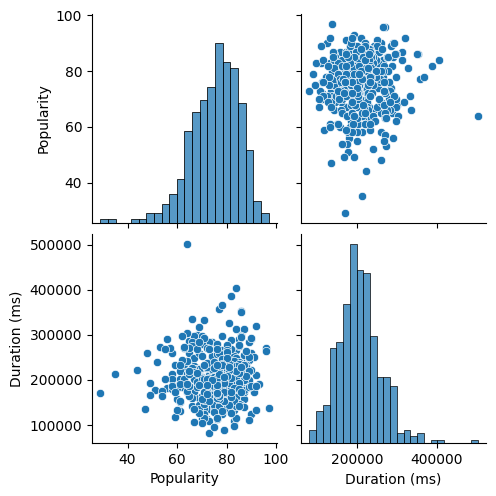

In [81]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

sns.pairplot(df, vars=['Popularity', 'Duration (ms)'])

<Axes: xlabel='Artist', ylabel='Duration (ms)'>

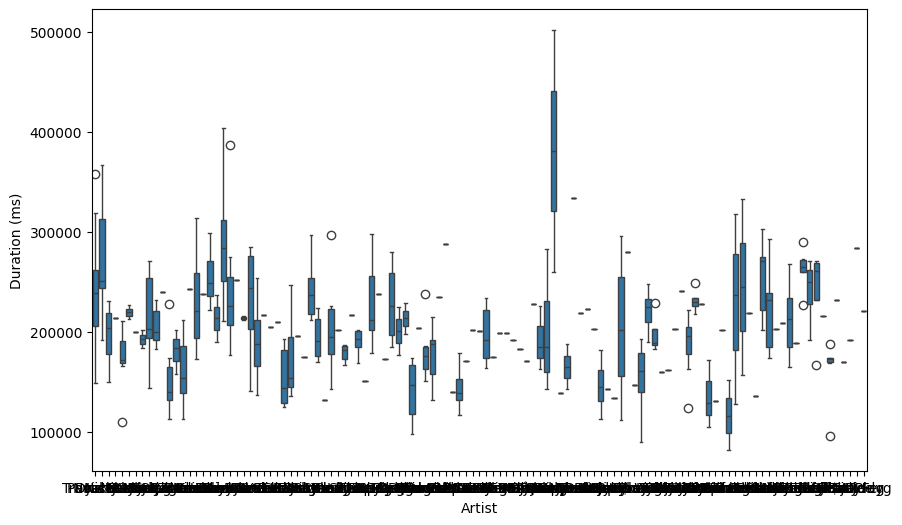

In [83]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Artist', y='Duration (ms)')

<Axes: xlabel='Artist', ylabel='Popularity'>

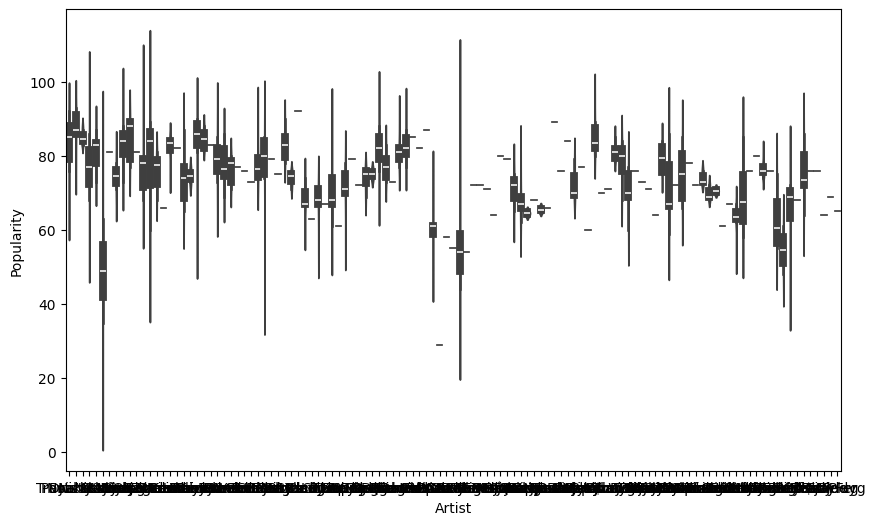

In [84]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Artist', y='Popularity')